## US Accidents Exploratory Data Analysis

TODO-talk about EDA 

TODO - talk about the dataset (source, what it contains, how it will be useful)

• Kaggle

• information about accidents

• can use useful to prevent accidents

• this dataset does not contain information about new york

## Data Preparation and Cleaning

1. Load the file using Pandas 
2. Look at some information about the data & the columns 
3. Fix any missing or incorrect values

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, spearmanr
import folium
from folium import plugins  
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('US_Accidents_March23.csv', low_memory=True)
df.head(5)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Null Values Treatment

In [6]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
missing_values_percentage = df.isnull().sum().sort_values(ascending=False) / len(df)
missing_values_percentage

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [8]:
type(missing_values_percentage)

pandas.core.series.Series

In [9]:
missing_values_percentage[missing_values_percentage != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

In [10]:
missing_values = missing_values_percentage[missing_values_percentage != 0]

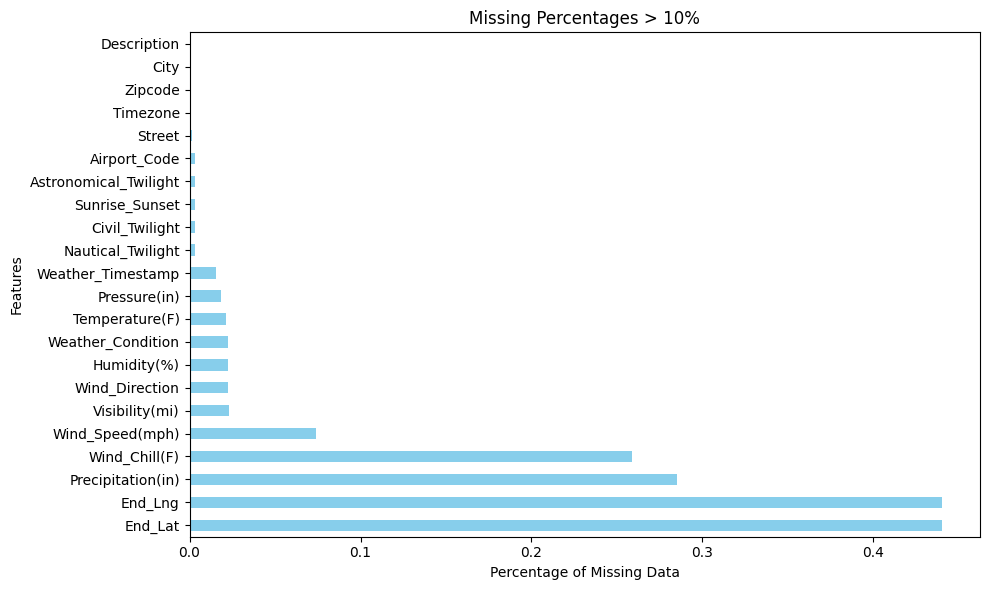

In [11]:
missing_values_percentage[missing_values_percentage != 0].plot(
    kind='barh', 
    color='skyblue', 
    figsize=(10, 6), 
    title='Missing Percentages > 10%', 
    legend=False,
)
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Features')
plt.tight_layout()


In [12]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

## Exploratory Analysis And Visualization

# Columns We'll Analyze

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Conditions

In [13]:
cities = df.City.unique()
len(cities)

13679

In [14]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [15]:
'New York' in df.City
#This dataset does not contain any data of new york

False

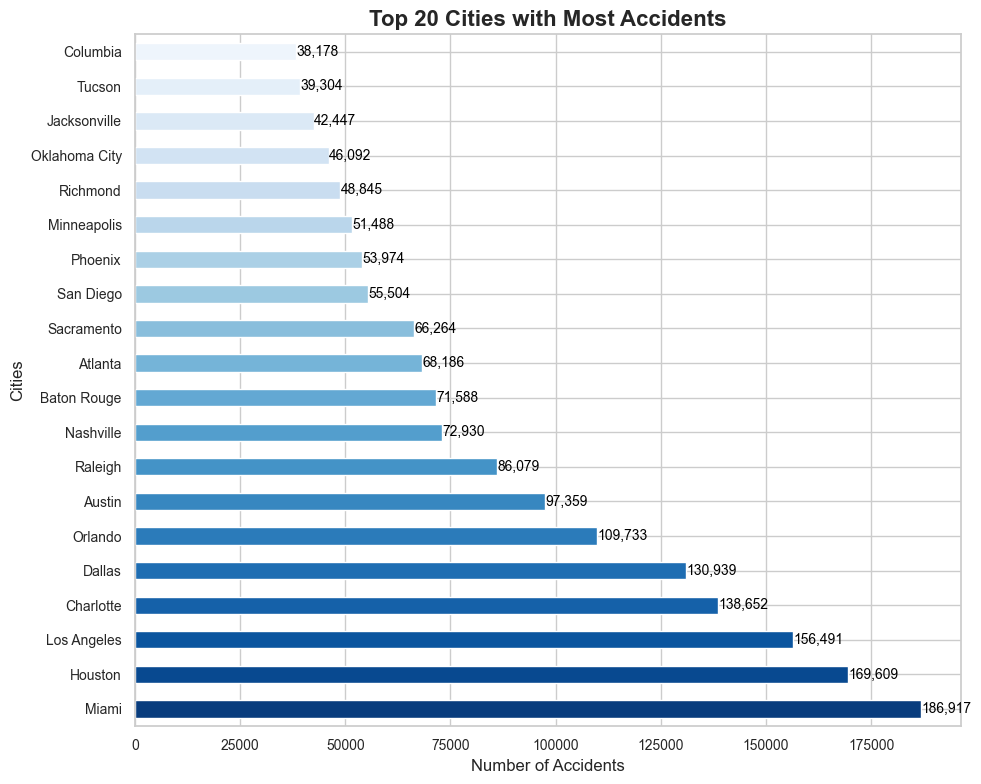

In [16]:
sns.set(style="whitegrid")

ax = cities_by_accident[:20].plot(kind='barh', color=sns.color_palette("Blues_r", n_colors=20), figsize=(10, 8))

ax.set_title('Top 20 Cities with Most Accidents', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Accidents', fontsize=12)
ax.set_ylabel('Cities', fontsize=12)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width() + 100, p.get_y() + p.get_height() / 2), 
                va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [17]:
high_accident_cities = cities_by_accident[cities_by_accident > 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]
len(high_accident_cities)  / len(cities)

0.08882228233057972

<Axes: xlabel='count', ylabel='Count'>

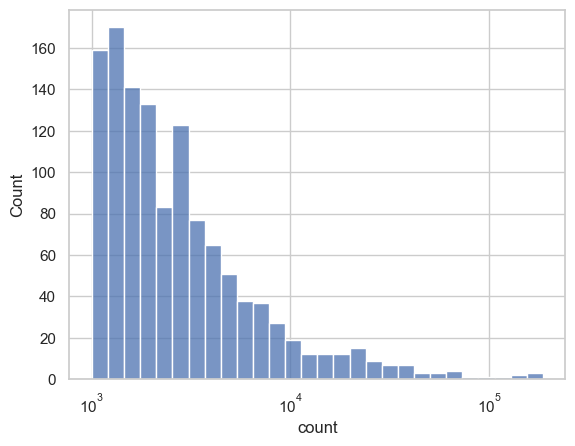

In [18]:
sns.histplot(high_accident_cities, log_scale=True)

In [19]:
cities_by_accident[cities_by_accident == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

## Start Time

In [20]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [21]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [29]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

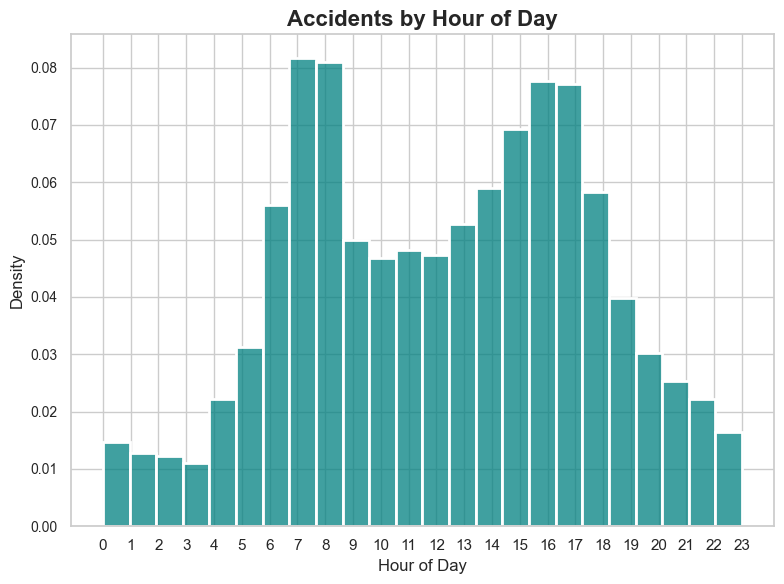

In [30]:

plt.figure(figsize=(8, 6))

sns.histplot(df.Start_Time.dt.hour, bins=24, color='teal', stat='density', linewidth=2)

plt.title('Accidents by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.xticks(range(0, 24))
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

- Most accidents happens between 7am to 8am & 16pm to 18pm (probably people are in hurry to get to work or come back from wrok)

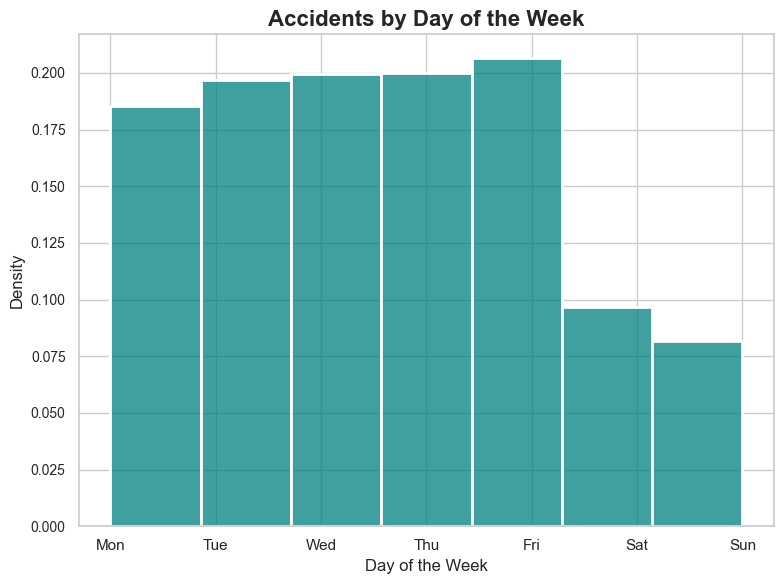

In [32]:
plt.figure(figsize=(8, 6))

sns.histplot(df.Start_Time.dt.dayofweek, bins=7, color='teal', stat='density', kde=False, linewidth=2)

plt.title('Accidents by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

- Is the distribution of accidents by hour the same on weekends as on weekdays.

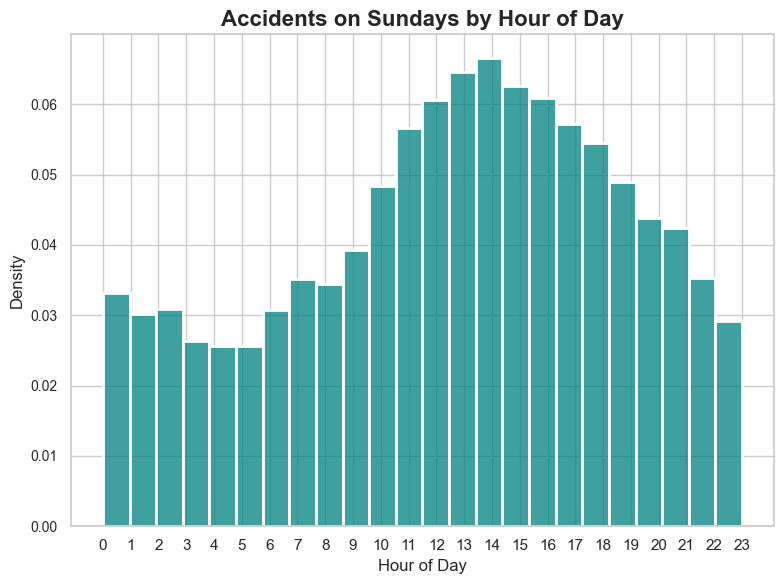

In [33]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]



plt.figure(figsize=(8, 6))

sns.histplot(sundays_start_time.dt.hour, bins=24, color='teal', stat='density', kde=False, linewidth=2)

plt.title('Accidents on Sundays by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.xticks(range(0, 24))
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

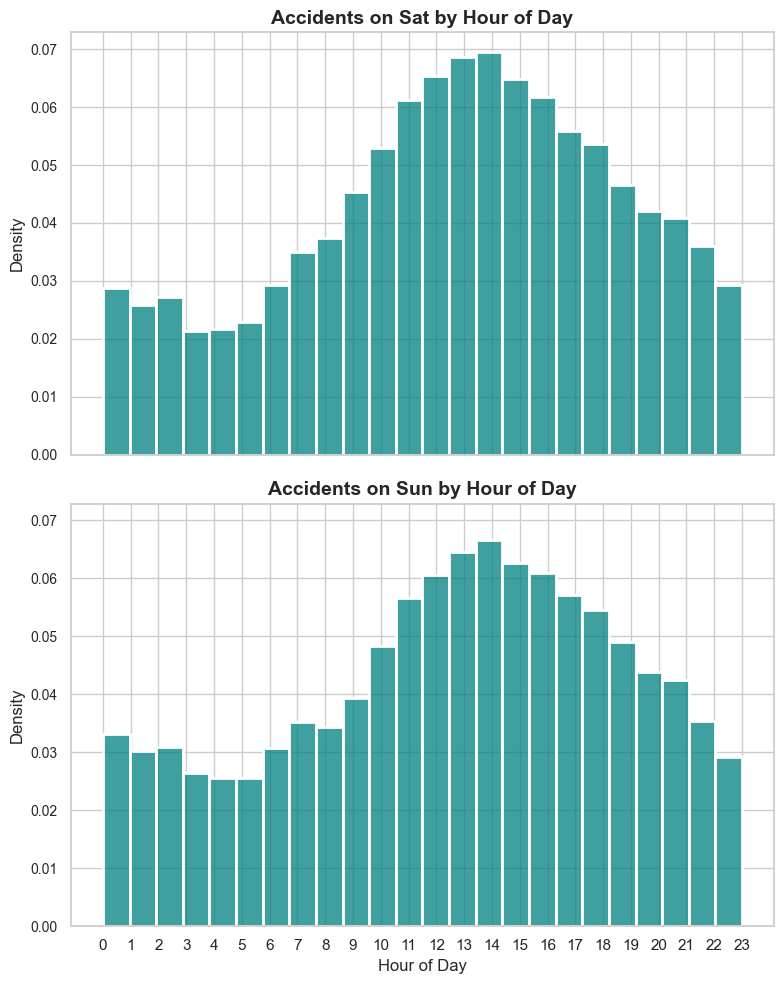

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True, sharey=True)

days = ['Sat', 'Sun']
for i, day in enumerate([5, 6]):
    ax = axes[i]
    day_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == day]
    sns.histplot(day_start_time.dt.hour, bins=24, color='teal', stat='density', kde=False, linewidth=2, ax=ax)
    ax.set_title(f'Accidents on {days[i]} by Hour of Day', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hour of Day', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.set_xticks(range(0, 24))
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()


-  On holidays most of the accidents are in between 13pm to 15pm

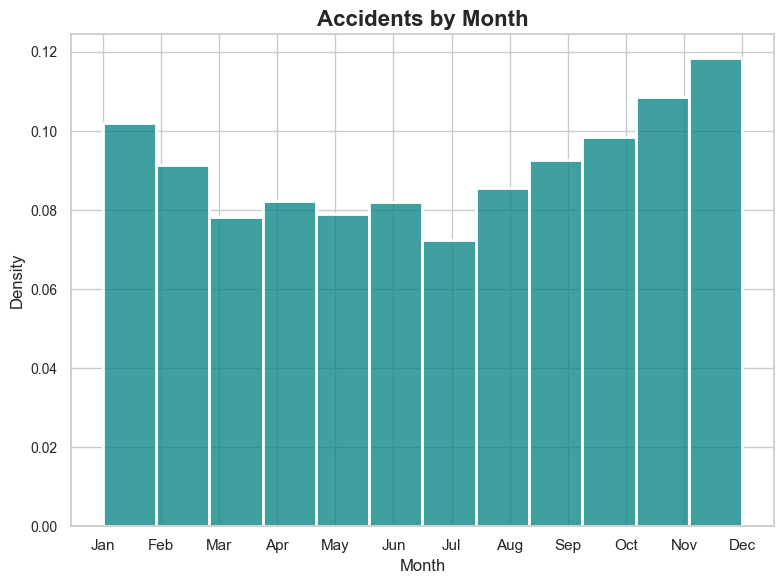

In [35]:
month_start_time = df.Start_Time[df.Start_Time.notna()] 
month_start_time = month_start_time.dt.month 

plt.figure(figsize=(8, 6))

sns.histplot(month_start_time, bins=12, color='teal', stat='density', kde=False, linewidth=2)

plt.title('Accidents by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [36]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')


In [37]:
df['Month'] = df['Start_Time'].dt.month

def map_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season'] = df['Month'].apply(map_season)

In [41]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Season
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,Night,Night,Night,Night,2.0,Winter
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,Night,Night,Night,Day,2.0,Winter
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,True,False,Night,Night,Day,Day,2.0,Winter
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,Night,Day,Day,Day,2.0,Winter
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,True,False,Day,Day,Day,Day,2.0,Winter


In [43]:
season_counts = df['Season'].value_counts()
season_counts

Season
Fall      2662918
Winter    1997071
Summer    1535219
Spring    1533186
Name: count, dtype: int64

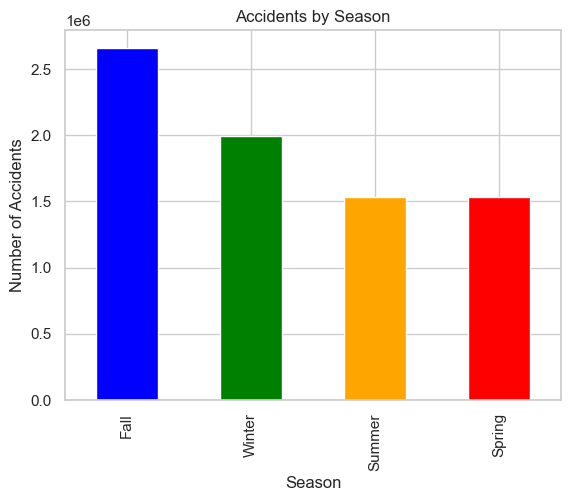

In [44]:
season_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.show()


## Start Latitude & Longitude

In [38]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [39]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

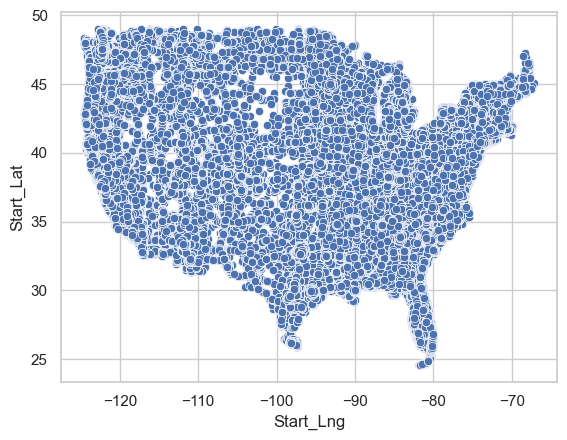

In [40]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

## Summery And Conclusion

Insights :

- The number of accidents per city decreases exponentially
- No data for new york
- Less then 8% of cities have more than  1000 yearly accidents
- Over 1023 cities have reported just one accident
- Miami, Houston and Los Angles are the top 3 cities with most number of accidents
- Most accidents happens between 7am to 8am & 16pm to 18pm (probably people are in hurry to get to work or come back from work)
- Less number of accidents on weekends compared to week days
- The majority of U.S. accidents occur in the **Fall** season, accounting for the highest number of incidents 2.66 million, followed by **Winter**, while **Summer** and **Spring** see significantly fewer accidents. This suggests that seasonal factors, such as weather or travel patterns, may influence accident frequency.
